# Data Exploration
## Basic Visualisation
## Calculate Correlation

In [4]:
import math
import pandas as pd
from sklearn import neighbors, datasets
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score

In [5]:
df = pd.read_csv('mm_master_demos.csv')
del df['Unnamed: 0']
del df['file']
del df['date']
del df['seconds']
del df['att_team']
del df['att_side']
del df['vic_team']
del df['vic_side']
del df['winner_team']
del df['winner_side']
del df['att_id']
del df['vic_id']
del df['award']
del df['is_bomb_planted']
del df['bomb_site']
df=  shuffle(df)
df

map  round    tick  hp_dmg  arm_dmg    hitbox          wp  \
810052       de_nuke     18  108922      26       29      Head         USP   
901293      de_dust2      1    7101     100        0      Head         USP   
502155    de_inferno     12   70218      16        3   LeftArm         P90   
426244    de_inferno     12   91936      19        5   Stomach         UMP   
611250      de_dust2      4   20675     100        1     Chest         AWP   
678265   de_overpass      9   52753       3        0   Generic  Incendiary   
769138      de_cache     10   61431       8        0   Generic  Incendiary   
387497      de_cache     10   61003       4        2   Generic     Unknown   
576171     de_mirage     12   71637       6        6   Stomach        M4A1   
518353     de_mirage     15   86619      28        6   Stomach        M4A1   
902569     de_mirage     17  107399      16        0  RightLeg         UMP   
697463      de_cache     13   99547       8        3     Chest        AK47   
895050     de_mirage     12   77471       7        3     Chest        AK47   
438243     de_mirage     18  108698      25        3     Chest        AK47   
272650      de_cache     20  113113      29        0     Chest        AK47   
623271      de_dust2     23  133601      10        1     Chest        AK47   
177697      de_dust2     20  108616      16        3     Chest         P90   
533392      de_dust2     10   55056      22        4     Chest        M4A4   
238433      de_dust2      1    8727       8        0   Generic  Incendiary   
781526      de_dust2      3   20508      34        0  RightArm        AK47   
806324     de_mirage      9   65791       5       28      Head       Glock   
33883     de_inferno      4   24597       8       19      Head        M4A1   
110056      de_dust2     21  123638      55       18   Generic          HE   
913138     de_mirage      5   40446      13        3     Chest         UMP   
541924      de_dust2     19  102288       8        7   Stomach       Scout   
622253      de_cache     15   74319      65        0     Chest         AWP   
692759      de_cbble     11   74318      22        4  RightArm        M4A4   
364261     de_mirage      2   14715      36        0   Stomach         USP   
673812      de_dust2      3   18408       3        0     Chest       Swag7   
481692      de_cache     11   74257      22        4     Chest        M4A1   
...              ...    ...     ...     ...      ...       ...         ...   
328897      de_cache      4   24858      43        0   Stomach        AK47   
317840     de_thrill     11   74541     100        1   Stomach         AWP   
806500     de_mirage     15  105303      16        0     Chest      XM1014   
552408      de_dust2     19  132660      16        3  RightArm         P90   
875388     de_mirage      3   25375      68        9      Head        AK47   
805615   de_overpass      5   31061      25        0   LeftLeg        AK47   
895118     de_mirage     15   98993       7        1   Stomach       Famas   
264010  cs_insertion      1    9817      14        6     Chest         USP   
827937      de_cbble      1   10383     100        0      Head       P2000   
699192      de_cache     15   97434      67       15      Head        AK47   
43818       de_cache     28  173086      10        1     Chest        AK47   
48483     de_austria     21  118330      23        0  RightLeg        AK47   
928835     de_mirage     30  161624     100       14      Head        AK47   
56546     de_inferno     23  141786      26        0  RightLeg        AK47   
368016     de_mirage     17  118282      15        5     Chest       Mac10   
259927      de_train      9   49378      26        3  RightArm        AK47   
832519      de_cache     21  129895      33        4   Stomach        AK47   
148015      de_cache     23  136260      56        0   Stomach         AWP   
908808      de_dust2     17  109522      35       13      Head          CZ   
508718      de_cbble     22  139071    

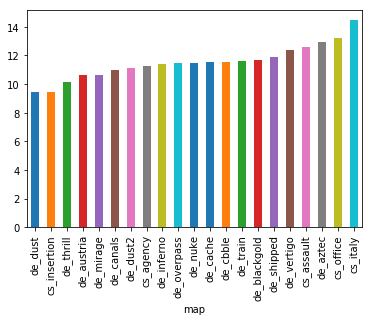

In [6]:
df.groupby('map')['att_rank'].mean().sort_values().plot(kind='bar')

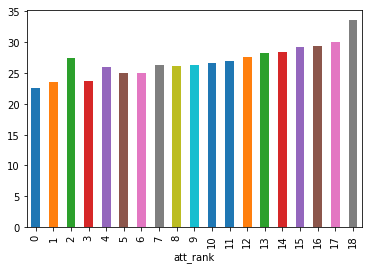

In [7]:
df.groupby('att_rank')['hp_dmg'].mean().plot(kind='bar')

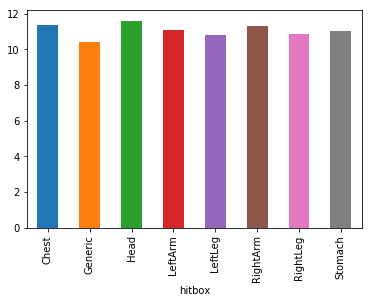

In [8]:
df.groupby('hitbox')['att_rank'].mean().plot(kind='bar')

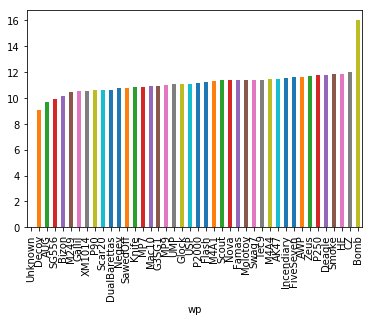

In [9]:
df.groupby('wp')['att_rank'].mean().sort_values().plot(kind='bar')

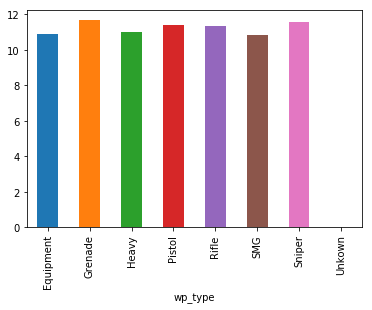

In [10]:
df.groupby('wp_type')['att_rank'].mean().plot(kind='bar')

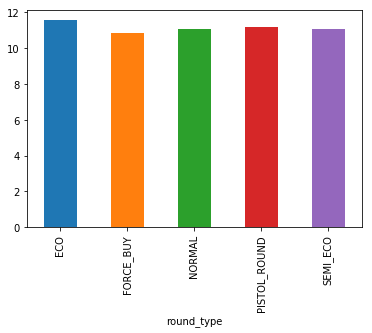

In [11]:
df.groupby('round_type')['att_rank'].mean().plot(kind='bar')

In [12]:
df.round_type.value_counts()

NORMAL          425090
ECO             244599
FORCE_BUY       143944
PISTOL_ROUND     75133
SEMI_ECO         66700
Name: round_type, dtype: int64

In [13]:
df.dtypes

map                object
round               int64
tick                int64
hp_dmg              int64
arm_dmg             int64
hitbox             object
wp                 object
wp_type            object
att_rank            int64
vic_rank            int64
att_pos_x         float64
att_pos_y         float64
vic_pos_x         float64
vic_pos_y         float64
round_type         object
ct_eq_val           int64
t_eq_val            int64
avg_match_rank    float64
dtype: object

# Data Preparation
## Filer
- Normalization
- Convert Text values to numbers

## Convert Categories
### Hitbox
Head and Chest --> UpperBody --> 0
Stomach and Arms --> CenterBody --> 1
Legs and Generic --> LowerBody --> 2

### Map
low skill high skill?

### Weapons
one hot encode has_bomb --> can KNN handle 0 values?
what todo with rest??

### Round Type
ECO --> 0
NORMAL, PISTOL, SEMI_ECO --> 1
FORCE_BUY --> 2

In [14]:
clean_df = df.copy()

numeric_cats = {
    "hitbox": {"Head": 0, "Chest": 0, "Stomach": 1, "RightArm": 1, "LeftArm": 1, "Generic": 2, "RightLeg": 2, "LeftLeg": 2},
    "round_type": {"ECO": 0, "NORMAL": 1, "PISTOL_ROUND": 1, "SEMI_ECO": 1, "FORCE_BUY": 2}
}
clean_df.replace(numeric_cats, inplace=True)
clean_df.head()
clean_df.hitbox.value_counts()
clean_df.dtypes

map                object
round               int64
tick                int64
hp_dmg              int64
arm_dmg             int64
hitbox              int64
wp                 object
wp_type            object
att_rank            int64
vic_rank            int64
att_pos_x         float64
att_pos_y         float64
vic_pos_x         float64
vic_pos_y         float64
round_type          int64
ct_eq_val           int64
t_eq_val            int64
avg_match_rank    float64
dtype: object

In [15]:
one_hot_df = pd.get_dummies(clean_df, columns=['map', 'wp_type', 'wp'])
one_hot_df.head()
one_hot_df.dtypes

round                 int64
tick                  int64
hp_dmg                int64
arm_dmg               int64
hitbox                int64
att_rank              int64
vic_rank              int64
att_pos_x           float64
att_pos_y           float64
vic_pos_x           float64
vic_pos_y           float64
round_type            int64
ct_eq_val             int64
t_eq_val              int64
avg_match_rank      float64
map_cs_agency         uint8
map_cs_assault        uint8
map_cs_insertion      uint8
map_cs_italy          uint8
map_cs_office         uint8
map_de_austria        uint8
map_de_aztec          uint8
map_de_blackgold      uint8
map_de_cache          uint8
map_de_canals         uint8
map_de_cbble          uint8
map_de_dust           uint8
map_de_dust2          uint8
map_de_inferno        uint8
map_de_mirage         uint8
                     ...   
wp_G3SG1              uint8
wp_Gallil             uint8
wp_Glock              uint8
wp_HE                 uint8
wp_Incendiary       

In [16]:
rankDF = one_hot_df['att_rank']
normalizedDF = (one_hot_df-one_hot_df.min())/(one_hot_df.max()-one_hot_df.min())
normalizedDF['att_rank']=rankDF.values
normalizedDF

round      tick  hp_dmg  arm_dmg  hitbox  att_rank  vic_rank  \
810052  0.586207  0.465746    0.26     0.29     0.0        15  0.833333   
901293  0.000000  0.004426    1.00     0.00     0.0        16  0.555556   
502155  0.379310  0.290390    0.16     0.03     0.5        14  0.777778   
426244  0.379310  0.388787    0.19     0.05     0.5         9  0.555556   
611250  0.103448  0.065926    1.00     0.01     0.0        11  0.611111   
678265  0.275862  0.211261    0.03     0.00     1.0         9  0.500000   
769138  0.310345  0.250579    0.08     0.00     1.0        10  0.611111   
387497  0.310345  0.248640    0.04     0.02     1.0         0  0.888889   
576171  0.379310  0.296819    0.06     0.06     0.5        13  0.777778   
518353  0.482759  0.364698    0.28     0.06     0.5        12  0.944444   
902569  0.551724  0.458845    0.16     0.00     1.0        11  0.666667   
697463  0.413793  0.423271    0.08     0.03     0.0         8  0.444444   
895050  0.379310  0.323251    0.07     0.03     0.0        14  0.777778   
438243  0.586207  0.464731    0.25     0.03     0.0        16  0.944444   
272650  0.655172  0.484734    0.29     0.00     0.0        10  0.500000   
623271  0.758621  0.577559    0.10     0.01     0.0         9  0.000000   
177697  0.655172  0.464359    0.16     0.03     0.0         0  0.388889   
533392  0.310345  0.221696    0.22     0.04     0.0        11  0.666667   
238433  0.000000  0.011793    0.08     0.00     1.0         8  0.500000   
781526  0.068966  0.065169    0.34     0.00     0.5        15  0.777778   
806324  0.275862  0.270333    0.05     0.28     0.0        10  0.611111   
33883   0.103448  0.083695    0.08     0.19     0.0        13  0.611111   
110056  0.689655  0.532419    0.55     0.18     1.0         9  0.444444   
913138  0.137931  0.155502    0.13     0.03     0.0        14  0.722222   
541924  0.620690  0.435689    0.08     0.07     0.5         7  0.333333   
622253  0.482759  0.308970    0.65     0.00     0.0        14  0.833333   
692759  0.344828  0.308966    0.22     0.04     0.5        10  0.555556   
364261  0.034483  0.038923    0.36     0.00     0.5         7  0.277778   
673812  0.068966  0.055655    0.03     0.00     0.0        15  0.888889   
481692  0.344828  0.308689    0.22     0.04     0.0        14  0.722222   
...          ...       ...     ...      ...     ...       ...       ...   
328897  0.103448  0.084878    0.43     0.00     0.5        10  0.500000   
317840  0.344828  0.309976    1.00     0.01     0.5         8  0.444444   
806500  0.482759  0.449349    0.16     0.00     0.0         9  0.555556   
552408  0.620690  0.573295    0.16     0.03     0.5         7  0.388889   
875388  0.068966  0.087220    0.68     0.09     0.0        14  0.722222   
805615  0.137931  0.112982    0.25     0.00     1.0        11  0.611111   
895118  0.482759  0.420761    0.07     0.01     0.5        11  0.666667   
264010  0.000000  0.016732    0.14     0.06     0.0         8  0.500000   
827937  0.000000  0.019296    1.00     0.00     0.0        17  0.888889   
699192  0.482759  0.413697    0.67     0.15     0.0        12  0.611111   
43818   0.931034  0.756453    0.10     0.01     0.0        12  0.722222   
48483   0.689655  0.508370    0.23     0.00     1.0        10  0.500000   
928835  1.000000  0.704522    1.00     0.14     0.0        10  0.611111   
56546   0.758621  0.614642    0.26     0.00     1.0         7  0.500000   
368016  0.551724  0.508153    0.15     0.05     0.0        11  0.555556   
259927  0.275862  0.195970    0.26     0.03     0.5         7  0.388889   
832519  0.689655  0.560768    0.33     0.04     0.5        12  0.722222   
148015  0.758621  0.589606    0.56     0.00     0.5        12  0.611111   
908808  0.551724  0.468464    0.35     0.13     0.0        14  0.777778   
508718  0.724138  0.602341    0.30     0.19     0.0        15  0.777778   
751374  0.586207  0.499345    0.06     0.01     0.0        15  0.777778   
37771   0.000000  0.012450    0.15  

In [17]:
normalizedDF.corr()['att_rank']

round               0.012081
tick                0.006935
hp_dmg              0.057941
arm_dmg            -0.035189
hitbox             -0.096196
att_rank            1.000000
vic_rank            0.645005
att_pos_x           0.027995
att_pos_y           0.043982
vic_pos_x           0.026662
vic_pos_y           0.044857
round_type         -0.072260
ct_eq_val           0.020356
t_eq_val            0.010572
avg_match_rank      0.786182
map_cs_agency       0.001691
map_cs_assault      0.017514
map_cs_insertion   -0.016428
map_cs_italy        0.038824
map_cs_office       0.047763
map_de_austria     -0.007140
map_de_aztec        0.012892
map_de_blackgold    0.003963
map_de_cache        0.056034
map_de_canals      -0.004107
map_de_cbble        0.028597
map_de_dust        -0.020419
map_de_dust2       -0.012625
map_de_inferno      0.022741
map_de_mirage      -0.100396
                      ...   
wp_G3SG1           -0.002974
wp_Gallil          -0.022521
wp_Glock           -0.007075
wp_HE         

In [18]:
normalizedDF.dtypes

round               float64
tick                float64
hp_dmg              float64
arm_dmg             float64
hitbox              float64
att_rank              int64
vic_rank            float64
att_pos_x           float64
att_pos_y           float64
vic_pos_x           float64
vic_pos_y           float64
round_type          float64
ct_eq_val           float64
t_eq_val            float64
avg_match_rank      float64
map_cs_agency       float64
map_cs_assault      float64
map_cs_insertion    float64
map_cs_italy        float64
map_cs_office       float64
map_de_austria      float64
map_de_aztec        float64
map_de_blackgold    float64
map_de_cache        float64
map_de_canals       float64
map_de_cbble        float64
map_de_dust         float64
map_de_dust2        float64
map_de_inferno      float64
map_de_mirage       float64
                     ...   
wp_G3SG1            float64
wp_Gallil           float64
wp_Glock            float64
wp_HE               float64
wp_Incendiary       

In [19]:
Y = normalizedDF['att_rank']
X = normalizedDF.copy()
del X['att_rank']

nEntries = 300000

knn=neighbors.KNeighborsClassifier(n_jobs=-1,n_neighbors=int(math.sqrt(nEntries)))
knn.fit(X.head(nEntries), Y.head(nEntries))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=547, p=2,
           weights='uniform')

In [20]:
prediction= knn.predict(X.iloc[nEntries:nEntries+10000])
print accuracy_score(Y.iloc[nEntries:nEntries+10000],prediction)

0.2877


In [21]:
newDF = normalizedDF[['hp_dmg', 'hitbox','att_rank','vic_rank','avg_match_rank']].copy()

newY = newDF['att_rank']
newX = newDF.copy()
del newX['att_rank']

nEntries = 300000


knn2=neighbors.KNeighborsClassifier(n_jobs=-1,n_neighbors=int(math.sqrt(nEntries)))
knn2.fit(newX.head(nEntries), newY.head(nEntries))
prediction= knn2.predict(newX.iloc[nEntries:nEntries+50000])
print accuracy_score(newY.iloc[nEntries:nEntries+50000],prediction)

0.42368


## Option for improvment
- reduce output classes
- order weapons and map by rank

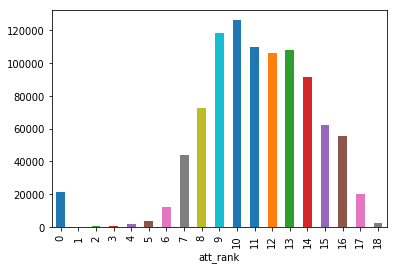

In [22]:
df.groupby('att_rank')['wp'].count().plot(kind='bar')

In [23]:
ReduceRankDF = newDF.copy()

numeric_cats = {
    "att_rank": {0:"0", 1:"0", 2:"0", 3:"0", 4:"0", 5:"0", 6:"0", 7:"0", 8:"0",
                9:"1", 10:"1", 11:"1", 12:"1", 13:"1", 14:"1",
                15:"2", 16:"2", 17:"2", 18:"2"}
}
ReduceRankDF.replace(numeric_cats, inplace=True)
ReduceRankDF.head()

hp_dmg  hitbox att_rank  vic_rank  avg_match_rank
810052    0.26     0.0        2  0.833333        0.666667
901293    1.00     0.0        2  0.555556        1.000000
502155    0.16     0.5        1  0.777778        0.777778
426244    0.19     0.5        1  0.555556        0.222222
611250    1.00     0.0        1  0.611111        0.444444

In [24]:
newY = ReduceRankDF['att_rank']
newX = ReduceRankDF.copy()
del newX['att_rank']

nEntries = 300000
knn2=neighbors.KNeighborsClassifier(n_jobs=-1,n_neighbors=int(math.sqrt(nEntries)))
knn2.fit(newX.head(nEntries), newY.head(nEntries))
prediction= knn2.predict(newX.iloc[nEntries:nEntries+50000])
print accuracy_score(newY.iloc[nEntries:nEntries+50000],prediction)

0.84378


# Cross Validation

In [22]:
nEntries = 100000

clf = neighbors.KNeighborsClassifier(n_jobs=-1,n_neighbors=int(math.sqrt(nEntries)))
sss = StratifiedShuffleSplit(n_splits=10)
scoresSSS = cross_val_score(clf, newX.head(nEntries), newY.head(nEntries), cv=sss)
print(scoresSSS)


[0.8435 0.8418 0.8376 0.8398 0.8373 0.8452 0.846  0.8421 0.8425 0.8454]


# Neural Network

In [103]:
import keras
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD

In [122]:
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=4))
model.add(Dropout(0.5))
for i in range(1,3):
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

sgd = SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)

model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

In [123]:
nEntries = 700000

newYBinary = to_categorical(newY.head(nEntries))
model.fit(newX.head(nEntries), newYBinary,
          epochs=50,
          batch_size=128)


Epoch 1/50
700000/700000 [==============================] - 16s 23us/step - loss: 0.6577 - acc: 0.7154
Epoch 2/50
700000/700000 [==============================] - 15s 22us/step - loss: 0.5202 - acc: 0.7766
Epoch 3/50
700000/700000 [==============================] - 15s 22us/step - loss: 0.4875 - acc: 0.7993
Epoch 4/50
700000/700000 [==============================] - 15s 22us/step - loss: 0.4753 - acc: 0.8079
Epoch 5/50
700000/700000 [==============================] - 15s 22us/step - loss: 0.4669 - acc: 0.8129
Epoch 6/50
700000/700000 [==============================] - 16s 22us/step - loss: 0.4616 - acc: 0.8148
Epoch 7/50
700000/700000 [==============================] - 15s 22us/step - loss: 0.4574 - acc: 0.8176
Epoch 8/50
700000/700000 [==============================] - 15s 22us/step - loss: 0.4547 - acc: 0.8187
Epoch 9/50
700000/700000 [==============================] - 18s 25us/step - loss: 0.4515 - acc: 0.8200
Epoch 10/50
700000/700000 [==============================] - 17s 24us/ste

In [120]:
newX.iloc[nEntries+1:nEntries+50000].head()
newY.iloc[nEntries+1:nEntries+50000].head()

830239    1
303032    1
443782    0
517164    1
867624    0
Name: att_rank, dtype: object

In [124]:
newYBinary = to_categorical(newY.iloc[nEntries+1:nEntries+50000])
score = model.evaluate(newX.iloc[nEntries+1:nEntries+50000], newYBinary, batch_size=nEntries/10)
score

49999/49999 [==============================] - 0s 7us/step


[0.40836086869239807, 0.8394967913627625]

128 4layer ln=0.01 --> 0.841


In [ ]:
## Compare complexity and time 

# TODO:
## Randomize data
## confusion matrix
## ROC curve